# Import Necessary Module

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

2025-06-29 00:50:19.239529: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-29 00:50:19.242750: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-29 00:50:19.253071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751136619.270276   27667 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751136619.276680   27667 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751136619.289356   27667 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

# Build a CNN having a pre-trained MobileNet as backbone to classify 10 classes.


In [3]:
# Load MobileNet with pretrained weights
mobilenet_model = MobileNet(input_shape=(32, 32, 3), weights='imagenet', include_top=False)

# Freeze the layers of MobileNet (backbone)
for layer in mobilenet_model.layers:
  layer.trainable = False

# Build a new model based on pre-trained MobileNet
inputs = mobilenet_model.inputs
x = mobilenet_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs, name='MobileNetModel')
model.summary(show_trainable=True)

/tmp/ipykernel_27667/973262380.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = MobileNet(input_shape=(32, 32, 3), weights='imagenet', include_top=False)
2025-06-29 00:50:20.938598: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "MobileNetModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 32, 32, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1 (Conv2D)              │ (None, 16, 16, 32)    │        864 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_bn                    │ (None, 16, 16, 32)    │        128 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_relu (ReLU)           │ (None, 16, 16, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1 (DepthwiseConv2D) │ (None, 16, 16, 32)    │        288 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_bn                │ (None, 16, 16, 32)    │        128 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_relu (ReLU)       │ (None, 16, 16, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1 (Conv2D)          │ (None, 16, 16, 64)    │      2,048 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_bn                │ (None, 16, 16, 64)    │        256 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_relu (ReLU)       │ (None, 16, 16, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pad_2 (ZeroPadding2D)  │ (None, 17, 17, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2 (DepthwiseConv2D) │ (None, 8, 8, 64)      │        576 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_bn                │ (None, 8, 8, 64)      │        256 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_relu (ReLU)       │ (None, 8, 8, 64)      │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2 (Conv2D)          │ (None, 8, 8, 128)     │      8,192 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_bn                │ (None, 8, 8, 128)     │        512 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_relu (ReLU)       │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3 (DepthwiseConv2D) │ (None, 8, 8, 128)     │      1,152 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_bn                │ (None, 8, 8, 128)     │        512 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_relu (ReLU)       │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3 (Conv2D)          │ (None, 8, 8, 128)     │     16,384 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3_bn                │ (None, 8, 8, 128)     │        512 │   N 

 Total params: 3,758,794 (14.34 MB)

 Trainable params: 529,930 (2.02 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

# Display Image Data

In [4]:
def display_img(images, labels):
  n = len(labels)
  plt.figure(figsize=(8, 6))
  for i in range (n):
    plt.subplot(5, 5, i + 1)
    if (len(images[i].shape)) == 2:
      plt.imshow(images[i], cmap='gray')
    else:
      plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')

  plt.tight_layout()
  plt.show()

# Load Dataset

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 64s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


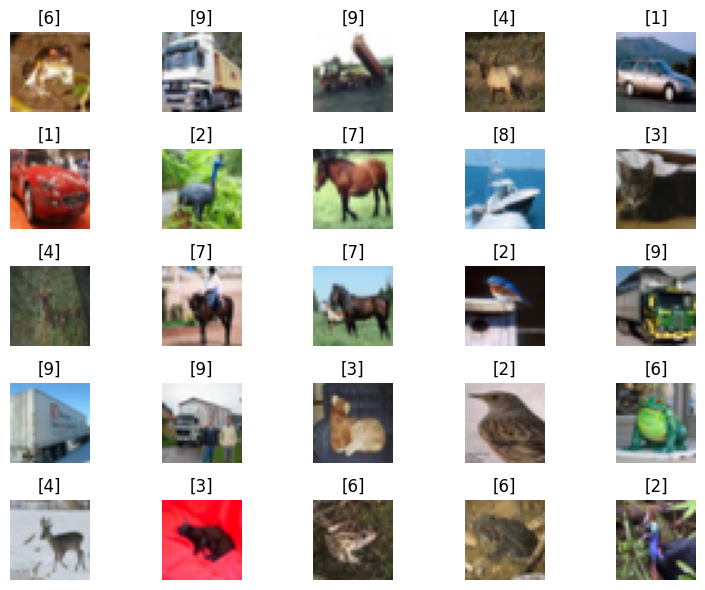

In [5]:
# Load Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Investigate Loaded data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Display some loaded image data
display_img(x_train[:25], y_train[:25])

# Prepare Dataset

In [6]:
# Turn 2D images into 3D so that trainX and trainY will be 4D since Convolutional layer takes 4D data as input
x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test, axis = -1)

# Investigate update x
print(x_train.shape)
print(x_test.shape)

# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

# Investigate update y
print(y_train.shape)
print(y_test.shape)

print(y_train[:5])

(50000, 32, 32, 3, 1)
(10000, 32, 32, 3, 1)
(50000, 10)
(10000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# 4. Train the CNN having a pre-trained MobileNet as backbone to classify images of the CIFAR-10 dataset (only transfer learning)

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size = 32, validation_split = 0.1, epochs = 10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.1820 - loss: 2.1960 - val_accuracy: 0.1986 - val_loss: 2.1417
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.2008 - loss: 2.1538 - val_accuracy: 0.2126 - val_loss: 2.1308
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.2087 - loss: 2.1448 - val_accuracy: 0.2054 - val_loss: 2.1287
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.2098 - loss: 2.1338 - val_accuracy: 0.2070 - val_loss: 2.1269
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.2137 - loss: 2.1250 - val_accuracy: 0.2182 - val_loss: 2.1221
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.2131 - loss: 2.1272 - val_accuracy: 0.2148 - val_loss: 2.1177
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.2136 - loss: 2.1201 - val_accuracy: 0.2116 - val_loss: 2.1198
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.2185 -

# 4. Test the CNN having a pre-trained MobileNet as backbone to classify images of the CIFAR-10 dataset (only transfer learning)

In [8]:
# Evaluate model performance
model.evaluate(x_test, y_test)

# Predict y valuse
y_predict = model.predict(x_test)

print('OriginalY  PredictY')
print('=========  ========')
for i in range(10):
  print(np.argmax(y_test[i]), '\t\t', np.argmax(y_predict[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2079 - loss: 2.1465
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
OriginalY  PredictY
=========  ========
3 		 8
8 		 9
8 		 1
0 		 1
6 		 6
6 		 6
1 		 6
6 		 6
3 		 6
1 		 4


# Unfreeze layers of the backbone

In [9]:
for layer in mobilenet_model.layers[-86:]:
  layer.trainable = True

In [10]:
model.summary(show_trainable=True)

Model: "MobileNetModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 32, 32, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1 (Conv2D)              │ (None, 16, 16, 32)    │        864 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_bn                    │ (None, 16, 16, 32)    │        128 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_relu (ReLU)           │ (None, 16, 16, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1 (DepthwiseConv2D) │ (None, 16, 16, 32)    │        288 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_bn                │ (None, 16, 16, 32)    │        128 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_relu (ReLU)       │ (None, 16, 16, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1 (Conv2D)          │ (None, 16, 16, 64)    │      2,048 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_bn                │ (None, 16, 16, 64)    │        256 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_relu (ReLU)       │ (None, 16, 16, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pad_2 (ZeroPadding2D)  │ (None, 17, 17, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2 (DepthwiseConv2D) │ (None, 8, 8, 64)      │        576 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_bn                │ (None, 8, 8, 64)      │        256 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_relu (ReLU)       │ (None, 8, 8, 64)      │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2 (Conv2D)          │ (None, 8, 8, 128)     │      8,192 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_bn                │ (None, 8, 8, 128)     │        512 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_relu (ReLU)       │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3 (DepthwiseConv2D) │ (None, 8, 8, 128)     │      1,152 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_bn                │ (None, 8, 8, 128)     │        512 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_relu (ReLU)       │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3 (Conv2D)          │ (None, 8, 8, 128)     │     16,384 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3_bn                │ (None, 8, 8, 128)     │        512 │   Y 

 Total params: 4,818,656 (18.38 MB)

 Trainable params: 3,736,906 (14.26 MB)

 Non-trainable params: 21,888 (85.50 KB)

 Optimizer params: 1,059,862 (4.04 MB)

# 4.Train the CNN having a pre-trained MobileNet as backbone to classify images of the CIFAR-10 dataset (transfer_learning + fine tuning)

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 32, validation_split = 0.1, epochs = 1000)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 183s 123ms/step - accuracy: 0.4324 - loss: 3.1552 - val_accuracy: 0.6676 - val_loss: 0.9381
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 173s 123ms/step - accuracy: 0.6737 - loss: 0.9460 - val_accuracy: 0.7388 - val_loss: 0.7871
Epoch 3/10
  87/1407 ━━━━━━━━━━━━━━━━━━━━ 2:41 123ms/step - accuracy: 0.7189 - loss: 0.8032

KeyboardInterrupt: 

# 4.Test the CNN having a pre-trained MobileNet as backbone to classify images of the CIFAR-10 dataset (transfer_learning + fine tuning)

In [ ]:
# Evaluate model performance
model.evaluate(x_test, y_test)

# Predict Y values
y_predict = model.predict(x_test)

print('OriginalY    PredictedY')
print('=========    ==========')
for i in range(10):
  print(np.argmax(y_test[i]), '\t\t', np.argmax(y_predict[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7774 - loss: 0.7250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
OriginalY    PredictedY
=========    ==========
3 		 3
8 		 1
8 		 8
0 		 0
6 		 6
6 		 6
1 		 1
6 		 3
3 		 3
1 		 1
